<center> 
<h3><b> Adnan Rashid </b><\h3>
<br><br>
    <nav>
    | <a href="00-Contents-Setup.ipynb"> Home Page </a> | 
    <a href="http://bit.ly/cka_notes_original"> Kubernetes Notes </a> |
    <a href="https://adnan.study"> Website </a> |
    <a href="https://www.instagram.com/adnans_techie_studies/"> Instagram </a> |
    <a href="https://www.linkedin.com/in/adnanrashid1/"> LinkedIn </a> |
    </nav>
</center>

<h1 style="background:black"><code style="background:black;color:white"><center>Create an EKS Cluster</center></code></h1>

<div class="alert alert-block alert-warning">
<font style="color:black">
<center>In this section we will create an EKS Cluster using eksctl. <br><br>We will also test connectivity and update our configuration files such that we can communicate with the kubernetes cluster

<center><img src="https://adnanstudyimages.s3-eu-west-1.amazonaws.com/9.jpg" width="50%" height="50%" border=5/></center>

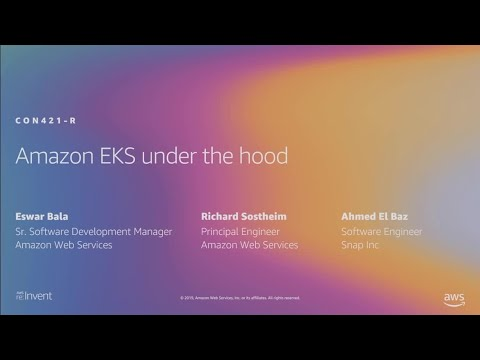

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('7vxDWDD2YnM')

## Pre-requisite

* Check your variables are loaded

In [ ]:
%store

* Load in variable store

In [ ]:
%store -r 

* Load variables into notebook

In [ ]:
%env AWS_PROFILE=$AWS_PROFILE
%env AWS_DEFAULT_REGION=$AWS_DEFAULT_REGION
%env ACCOUNT_ID=$ACCOUNT_ID

* Check identity 

In [ ]:
!aws sts get-caller-identity

<br>

---
---

<br>

* Configure KMS settings for EKS Cluster. This must be done when creating the cluster as it is not possible to 

In [ ]:
!cat create_cluster/eksworkshop.yaml | sed 's|MASTER_ARN|'"$MASTER_ARN"'|' > create_cluster/eksworkshop_modified.yaml

* Create the cluster - you can check  'Cloudformation' in the console also

This will take at least <b>20 minutes</b>. It will create a VPC, security groups, the kubernetes cluster and nodes

In [ ]:
!eksctl create cluster -f create_cluster/eksworkshop_modified.yaml

* If you can see the nodes, this means we have successfully connected to our cluster

In [ ]:
!kubectl get nodes

* Update kubeconfig. This file contains the details to connect to the kubernetes cluster 

In [ ]:
!aws eks update-kubeconfig --name eksworkshop-eksctl

* Get stack name and set as environment variable

In [ ]:
!eksctl get nodegroup --cluster eksworkshop-eksctl -o json | jq -r '.[].StackName'

In [ ]:
STACK_NAME='eksctl-eksworkshop-eksctl-nodegroup-nodegroup'
%store STACK_NAME

* Get role name and add to variable

In [ ]:
!aws cloudformation describe-stack-resources --stack-name $STACK_NAME | jq -r '.StackResources[] | select(.ResourceType=="AWS::IAM::Role") | .PhysicalResourceId'

In [ ]:
ROLE_NAME='eksctl-eksworkshop-eksctl-nodegro-NodeInstanceRole-1R0XW7B54TSA2'
%store ROLE_NAME

### <br><br><center> We now have an Kubernetes cluster! 